In [5]:
%time
import datetime
print ("Current date and time : ", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), '\n')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Current date and time :  2024-02-14 04:54:00 



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [ ]:
!pip install --upgrade -q gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)
sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Jm3gvRWJSTARGW2ejFajhZ3qKNfGBN2SNKgJ8PJnzh0")
#sh = gc.open_by_key("Insert Sheet key here")
worksheet = sh.worksheet("Form Responses 1")
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows[1:])
print("Number of columns:", len(df.columns))
print("Number of observations:", len(df))
df[:]

Number of columns: 11
Number of observations: 5


,0,1,2,3,4,5,6,7,8,9,10
0,2/11/2024 14:30:56,University of Kentucky,University of Calgary,Université Laval,,,,,,,
1,2/11/2024 14:37:06,UC Davis,University of Wisconsin - Milwaukee,York University,,,,,,,
2,2/11/2024 14:39:01,University at Buffalo,Essex University,"University at Texas, Dallas",York University,,,,,,
3,2/11/2024 14:43:52,York University,Université Laval,Concordia University,,,,,,,
4,2/11/2024 15:12:54,SUNY Buffalo,Cornell University,Nova Southeastern University,SUNY Binghamton,SUNY Poly,Université Laval,,,,


In [23]:
import networkx as nx
import itertools

In [24]:
#DG = nx.DiGraph() ##### I DON'T WANT A DIRECTED GRAPH HERE
G = nx.Graph()

In [25]:
def add_edge(n1, n2, weight=None):
    if not G.has_edge(n1,n2):
        G.add_edge(n1,n2)
        G[n1][n2]['weight']=1        ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
    else:
        G[n1][n2]['weight']+=1

In [26]:
def add_node(n1, weight=None):
    if not G.has_node(n1):
        G.add_node(n1)
        G.node[n1]['weight']=1      ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
    else:
        G.node[n1]['weight']+=1

def add_node_user(n1, color='red', style='filled', weight=None):
    if not G.has_node(n1):
        G.add_node(n1)
        G.nodes[n1]['weight']=1      ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
        G.nodes[n1]['color']='red'
        G.nodes[n1]['style']='filled'
        G.nodes[n1]['fillcolor'] = 'pink'
    else:
        G.nodes[n1]['weight']+=1

In [27]:
df = df.reset_index()
df

,index,Timestamp,ENTER UP TO 10 AFFILIATIONS BELOW:\n\nAffiliation 1,Affiliation 2,Affiliation 3,Affiliation 4,Affiliation 5,Affiliation 6,Affiliation 7,Affiliation 8,Affiliation 9,Affiliation 10
0,0,2/11/2024 14:30:56,University of Kentucky,University of Calgary,Université Laval,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2/11/2024 14:37:06,UC Davis,University of Wisconsin - Milwaukee,York University,,,,NaN,NaN,NaN,NaN
2,2,2/11/2024 14:39:01,University at Buffalo,Essex University,"University at Texas, Dallas",York University,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2/11/2024 14:43:52,York University,Université Laval,Concordia University,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2/11/2024 15:12:54,SUNY Buffalo,Cornell University,Nova Southeastern University,SUNY Binghamton,SUNY Poly,Université Laval,NaN,NaN,NaN,NaN


In [30]:
#df['affiliations'] = df.apply(lambda row: [row[col] for col in range(1, 11) if pd.notnull(row[col])], axis=1)
df['affiliations'] = df.apply(lambda row: [row[col] for col in range(2, 12) if row[col]!=''], axis=1)
df[['index', 'affiliations']]

,index,affiliations
0,0,"[University of Kentucky, University of Calgary..."
1,1,"[UC Davis, University of Wisconsin - Milwaukee..."
2,2,"[University at Buffalo, Essex University, Univ..."
3,3,"[York University, Université Laval, Concordia ..."
4,4,"[SUNY Buffalo, Cornell University, Nova Southe..."


# With University of Ottawa as Node

In [31]:
G.clear()
links=[]

#ADD NODES AND EDGES
for index, row in df[:].iterrows():
    links = []
    #affiliations = []
    sender = row['index']
    #print('sender:', sender)
    links = row['affiliations']
    #print(affiliations)
    #links.append('University of Ottawa')
    links = [i for i in links if pd.notnull(i)]
    links = [i for i in links if i!=' ']
    print(links)
    #print('All affiliations:', affiliations)
    for a in links:
        add_node_user(a)

    if len(links)>1:
      for link in links:
        add_edge('University of Ottawa', link)

['University of Kentucky', 'University of Calgary', 'Université Laval']
['UC Davis', 'University of Wisconsin - Milwaukee', 'York University']
['University at Buffalo', 'Essex University', 'University at Texas, Dallas', 'York University']
['York University', 'Université Laval', 'Concordia University']
['SUNY Buffalo', 'Cornell University', 'Nova Southeastern University', 'SUNY Binghamton', 'SUNY Poly', 'Université Laval']


In [32]:
G.nodes(data=True)

NodeDataView({'University of Kentucky': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'University of Calgary': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'Université Laval': {'weight': 3, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'University of Ottawa': {}, 'UC Davis': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'University of Wisconsin - Milwaukee': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'York University': {'weight': 3, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'University at Buffalo': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'Essex University': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'University at Texas, Dallas': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'Concordia University': {'weight': 1, 'color': 'red', 'style': 'filled', 'fillcolor': 'pink'}, 'SUNY B

In [33]:
G.edges(data=True)

EdgeDataView([('University of Kentucky', 'University of Ottawa', {'weight': 1}), ('University of Calgary', 'University of Ottawa', {'weight': 1}), ('Université Laval', 'University of Ottawa', {'weight': 3}), ('University of Ottawa', 'UC Davis', {'weight': 1}), ('University of Ottawa', 'University of Wisconsin - Milwaukee', {'weight': 1}), ('University of Ottawa', 'York University', {'weight': 3}), ('University of Ottawa', 'University at Buffalo', {'weight': 1}), ('University of Ottawa', 'Essex University', {'weight': 1}), ('University of Ottawa', 'University at Texas, Dallas', {'weight': 1}), ('University of Ottawa', 'Concordia University', {'weight': 1}), ('University of Ottawa', 'SUNY Buffalo', {'weight': 1}), ('University of Ottawa', 'Cornell University', {'weight': 1}), ('University of Ottawa', 'Nova Southeastern University', {'weight': 1}), ('University of Ottawa', 'SUNY Binghamton', {'weight': 1}), ('University of Ottawa', 'SUNY Poly', {'weight': 1})])

In [34]:
print(G.number_of_nodes())
print(G.number_of_edges())

16
15


In [35]:
widths = nx.get_edge_attributes(G, 'weight')
widths

{('University of Kentucky', 'University of Ottawa'): 1,
 ('University of Calgary', 'University of Ottawa'): 1,
 ('Université Laval', 'University of Ottawa'): 3,
 ('University of Ottawa', 'UC Davis'): 1,
 ('University of Ottawa', 'University of Wisconsin - Milwaukee'): 1,
 ('University of Ottawa', 'York University'): 3,
 ('University of Ottawa', 'University at Buffalo'): 1,
 ('University of Ottawa', 'Essex University'): 1,
 ('University of Ottawa', 'University at Texas, Dallas'): 1,
 ('University of Ottawa', 'Concordia University'): 1,
 ('University of Ottawa', 'SUNY Buffalo'): 1,
 ('University of Ottawa', 'Cornell University'): 1,
 ('University of Ottawa', 'Nova Southeastern University'): 1,
 ('University of Ottawa', 'SUNY Binghamton'): 1,
 ('University of Ottawa', 'SUNY Poly'): 1}

In [36]:
import matplotlib.pyplot as plt

In [37]:
plt.rcParams['figure.figsize'] = (32,8)

#### Graph with Edge Weights

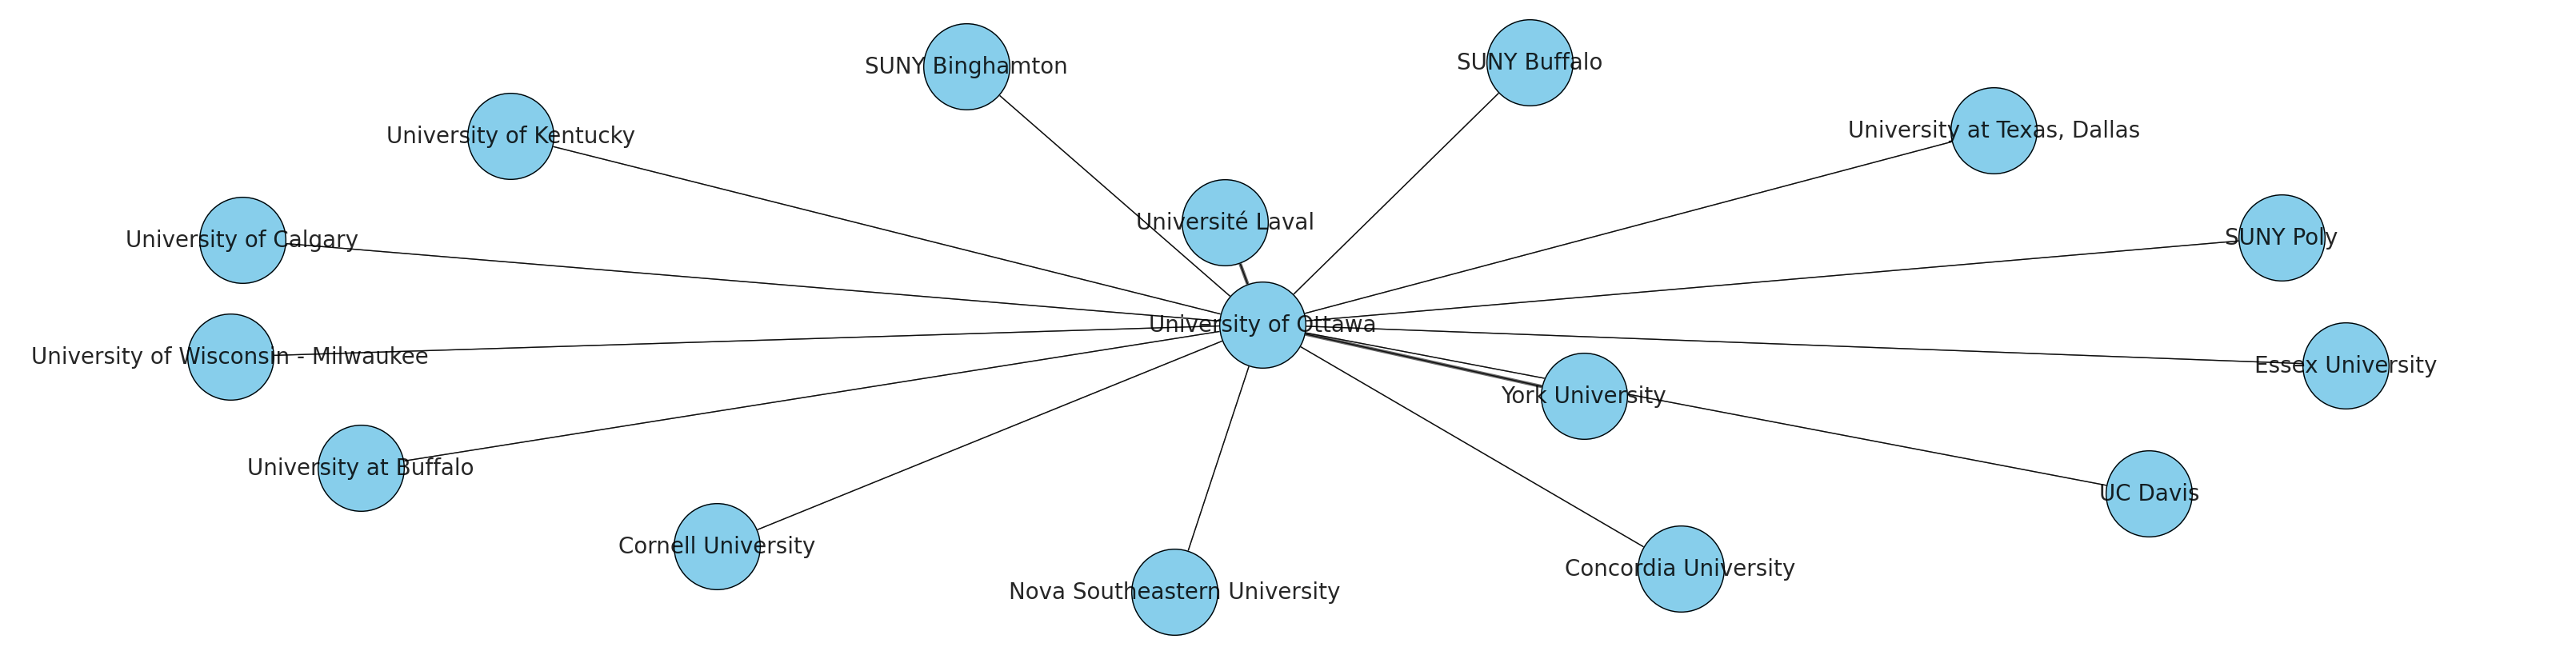

In [38]:
pos = nx.spring_layout(G)
widths = nx.get_edge_attributes(G, 'weight')

nx.draw(G, with_labels=True, node_size=1500, pos=pos, node_color="skyblue", linewidths=40, font_size=20, alpha=0.85)
nodes = nx.draw_networkx_nodes(G, pos=pos, node_size=6000, node_color="skyblue", edgecolors='k')

nx.draw_networkx_edges(G,pos, edgelist = widths.keys(), width=list(widths.values()), edge_color='black', alpha=0.6)

# Version with Individual Respondents as Nodes

In [ ]:
G.clear()

#ADD NODES AND EDGES
for index, row in df[:].iterrows():
    links = []
    #affiliations = []
    sender = row['index']
    #print('sender:', sender)
    links = row['affiliations']
    #print(affiliations)
    links.append(sender)
    links = [i for i in links if pd.notnull(i)]
    links = [i for i in links if i!=' ']
    print(links)
    #print('All affiliations:', affiliations)
    for a in links:
        add_node_user(a)

    if len(affiliations)>1:
        edge_combos = itertools.combinations(links, 2)
        for combo in edge_combos:
            add_edge(combo[0], combo[1])

['University of Awesome', 'University of Saxton', 0]
['UC Davis', ' University of Wisconsin - Milwaukee', ' York University', 1]
['University at Buffalo', 'Essex University', 'University at Texas, Dallas', 'York University', 2]
[3]
['SUNY Buffalo', 'Cornell University', 'Nova Southeastern University', 'SUNY Binghamton', 'SUNY Poly', 4]


In [ ]:
#print(G.number_of_nodes())
#print(G.number_of_edges())

In [ ]:
#G.nodes(data=True)

In [ ]:
#G.edges(data=True)

In [ ]:
#nx.draw(G, with_labels = True)

In [18]:
!wget 'https://github.com/gdsaxton/SNA_Example/blob/main/Co-Author%20University%20Network.csv?raw=true'

--2024-02-14 04:58:58--  https://github.com/gdsaxton/SNA_Example/blob/main/Co-Author%20University%20Network.csv?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gdsaxton/SNA_Example/raw/main/Co-Author%20University%20Network.csv [following]
--2024-02-14 04:58:58--  https://github.com/gdsaxton/SNA_Example/raw/main/Co-Author%20University%20Network.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gdsaxton/SNA_Example/main/Co-Author%20University%20Network.csv [following]
--2024-02-14 04:58:58--  https://raw.githubusercontent.com/gdsaxton/SNA_Example/main/Co-Author%20University%20Network.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserco

In [19]:
import os
os.listdir()

['.config',
 'drive',
 'Co-Author University Network.csv?raw=true',
 'sample_data']

In [20]:
os.rename('Co-Author University Network.csv?raw=true', 'Co-Author University Network.csv')

In [21]:
os.listdir()

['.config', 'drive', 'Co-Author University Network.csv', 'sample_data']

In [22]:
%%time
import datetime
print ("Current date and time : ", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), '\n')
df = pd.read_csv('Co-Author University Network.csv')
print('# of columns:', len(df.columns))
print('# of observations:', len(df))
df[:]

Current date and time :  2024-02-14 04:59:13 

# of columns: 11
# of observations: 5
CPU times: user 3.23 ms, sys: 0 ns, total: 3.23 ms
Wall time: 3.11 ms


,Timestamp,ENTER UP TO 10 AFFILIATIONS BELOW:\n\nAffiliation 1,Affiliation 2,Affiliation 3,Affiliation 4,Affiliation 5,Affiliation 6,Affiliation 7,Affiliation 8,Affiliation 9,Affiliation 10
0,2/11/2024 14:30:56,University of Kentucky,University of Calgary,Université Laval,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/11/2024 14:37:06,UC Davis,University of Wisconsin - Milwaukee,York University,,,,NaN,NaN,NaN,NaN
2,2/11/2024 14:39:01,University at Buffalo,Essex University,"University at Texas, Dallas",York University,NaN,NaN,NaN,NaN,NaN,NaN
3,2/11/2024 14:43:52,York University,Université Laval,Concordia University,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/11/2024 15:12:54,SUNY Buffalo,Cornell University,Nova Southeastern University,SUNY Binghamton,SUNY Poly,Université Laval,NaN,NaN,NaN,NaN
